In [1]:
import ga4beamlines as ga4b

Imported!
I've been imported!


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

## Initial Parameters

In [4]:
nGenerations = 500
critVal = 0.9
startPop = None

In [5]:
popSize = 100
nElite = 10
alpha = 0.75
s = 1.5

In [6]:
numRuns = 10

In [7]:
'''
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m4", "lo": -10, "hi": 5, "sigma": .1},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": .1},
          {"name": "m6", "lo": -5, "hi": 8, "sigma": .1},
          {"name": "m7", "lo": 0, "hi": 10, "sigma": .1},
          {"name": "m8", "lo": -10, "hi": 10, "sigma": .1}]
'''

'\nmotors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m2", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m3", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m4", "lo": -10, "hi": 5, "sigma": .1},\n          {"name": "m5", "lo": -5, "hi": 5, "sigma": .1},\n          {"name": "m6", "lo": -5, "hi": 8, "sigma": .1},\n          {"name": "m7", "lo": 0, "hi": 10, "sigma": .1},\n          {"name": "m8", "lo": -10, "hi": 10, "sigma": .1}]\n'

In [8]:
'''
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1.5},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": 0.5},
          {"name": "m4", "lo": -10, "hi": 5, "sigma": 2},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m6", "lo": -5, "hi": 8, "sigma": 1.25},
          {"name": "m7", "lo": 0, "hi": 10, "sigma": 2},
          {"name": "m8", "lo": -10, "hi": 10, "sigma": 3}]
'''

'\nmotors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},\n          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1.5},\n          {"name": "m3", "lo": -5, "hi": 5, "sigma": 0.5},\n          {"name": "m4", "lo": -10, "hi": 5, "sigma": 2},\n          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},\n          {"name": "m6", "lo": -5, "hi": 8, "sigma": 1.25},\n          {"name": "m7", "lo": 0, "hi": 10, "sigma": 2},\n          {"name": "m8", "lo": -10, "hi": 10, "sigma": 3}]\n'

In [9]:
motors = [{"name": "m1", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m2", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m3", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m4", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m5", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m6", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m7", "lo": -5, "hi": 5, "sigma": 1},
          {"name": "m8", "lo": -5, "hi": 5, "sigma": 1}]

In [10]:
testSMode = ga4b.sMode[0]
testPMode = ga4b.pMode[0]
testCXMode = ga4b.cxMode[0]
testMMode = ga4b.mMode[0]
testFMode = ga4b.fMode[0]

## Plotting Functions

In [11]:
def PlotResults(pop):
    plt.plot(pop.fitHistory.loc[:, "aveFitness":"peakFitness"])
    plt.title(
    f"""Fitness History of Population\nSurvivor Method: {pop.sSel['name']}, Num. Elite: {pop.sSel['nElite']}
    Parent Method: {pop.pSel['name']}, S: {pop.pSel['s']}
    Child Method: {pop.cxMode['name']}, Alpha: {pop.cxMode['alpha']}
    Mutation Method: {pop.mMode['name']}
    Population Size: {pop.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.legend(pop.fitHistory, loc = "upper right", title="Runs")
    plt.tight_layout()
    plt.show()

In [18]:
def PlotMultRuns(pop, generations, runs):
    startPop = pop.population
    multirunDF = pd.DataFrame()
    
    for i in range(runs):
        label = f"Run {i} Average Fitness"
        pop.population = startPop
        pop.generation = 0
        pop.fitHistory = pd.DataFrame({"aveFitness": [], "peakFitness": [], "peakParameters": []})
        
        pop.FirstGeneration() 

        print(f'Starting Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}')

        while pop.fitHistory["peakFitness"][pop.generation - 1] < critVal and pop.generation < nGenerations:
            pop.NextGeneration()
              
        print(f'Final Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}\n')
        
        multirunDF[label] = pop.fitHistory["aveFitness"]
        label = f"Run {i} Peak Fitness"     
        multirunDF[label] = pop.fitHistory["peakFitness"]
              
    plt.plot(multirunDF)
    plt.title(
    f"""Comparison of {runs} Runs\nSurvivor Method: {pop.sSel['name']}, Num. Elite: {pop.sSel['nElite']}
    Parent Method: {pop.pSel['name']}, S: {pop.pSel['s']}
    Child Method: {pop.cxMode['name']}, Alpha: {pop.cxMode['alpha']}
    Mutation Method: {pop.mMode['name']}
    Population Size: {pop.nPop}""")
    plt.ylabel('Fitness')
    plt.xlabel('Generation')
    plt.legend(multirunDF, loc = "center left", bbox_to_anchor=(1, 0.5), title="Runs")
    plt.tight_layout()
    plt.show()

In [19]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [21]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "uniform"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [23]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "single", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [25]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [27]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [29]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "genitor", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [31]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probFit", "s": s}, 
                       cxMode = {"name": "simple", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [19]:
pop = ga4b.GA4Beamline(motors = motors, 
                       survivorMode = {"name": "age", "nElite": nElite}, 
                       parentMode = {"name": "probRank", "s": s}, 
                       cxMode = {"name": "whole", "alpha": alpha}, 
                       mutationMode = {"name": "gaussian"}, 
                       fitness = testFMode,
                       nPop = popSize,
                       initPop = startPop)

In [ ]:
startPop = pop.population

In [ ]:
startPop

In [ ]:
#Evolve population until nGenerations exceeded or critVal achieved
pop.FirstGeneration() 

print(f'Starting Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}')
      
while pop.fitHistory["peakFitness"][pop.generation - 1] < critVal and pop.generation < nGenerations:
    pop.NextGeneration()
      
    #Print/plot updates after each generation if desired
print(f'Final Conditions: {pop.fitHistory["peakFitness"][pop.generation - 1].tolist()}')

In [ ]:
pop.fitHistory

Starting Conditions: 0.4098584286891934
Final Conditions: 0.8994333504743146

Starting Conditions: 0.4098584286891934
Final Conditions: 0.9188848599544425

Starting Conditions: 0.4098584286891934
Final Conditions: 0.9008189118952981

Starting Conditions: 0.4098584286891934
Final Conditions: 0.9044273008495075

Starting Conditions: 0.4098584286891934
Final Conditions: 0.9348357366336497

Starting Conditions: 0.4098584286891934
Final Conditions: 0.8961596152873866

Starting Conditions: 0.4098584286891934
Final Conditions: 0.8978881197813383

Starting Conditions: 0.4098584286891934
Final Conditions: 0.938738781143568

Starting Conditions: 0.4098584286891934
Final Conditions: 0.8998455944870244

Starting Conditions: 0.4098584286891934
Final Conditions: 0.9590145465807662



<IPython.core.display.Javascript object>


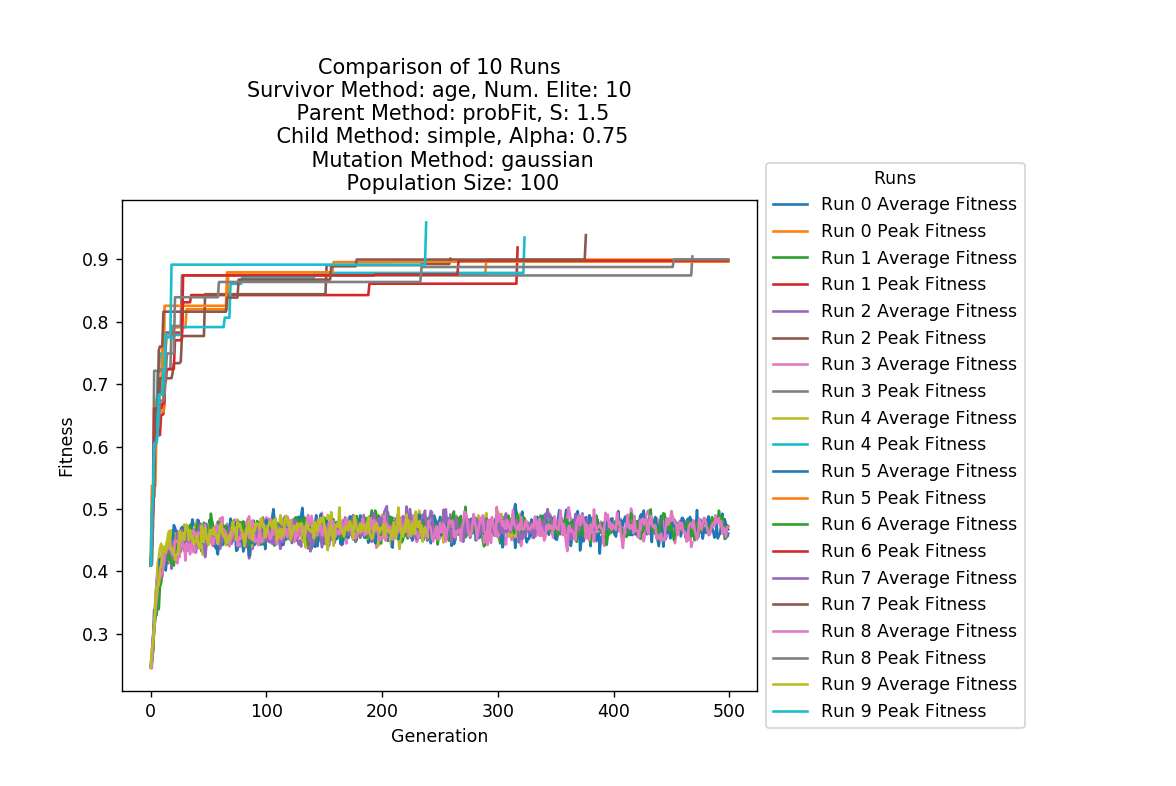

In [32]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9070791855161001

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9057730745721354

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9145337416264117

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9244755395395234

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9045159960819771

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9123945780007652

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9570816049615025

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9059034242430812

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9537868091300581

Starting Conditions: 0.5137034271046889
Final Conditions: 0.9038307627358229



<IPython.core.display.Javascript object>


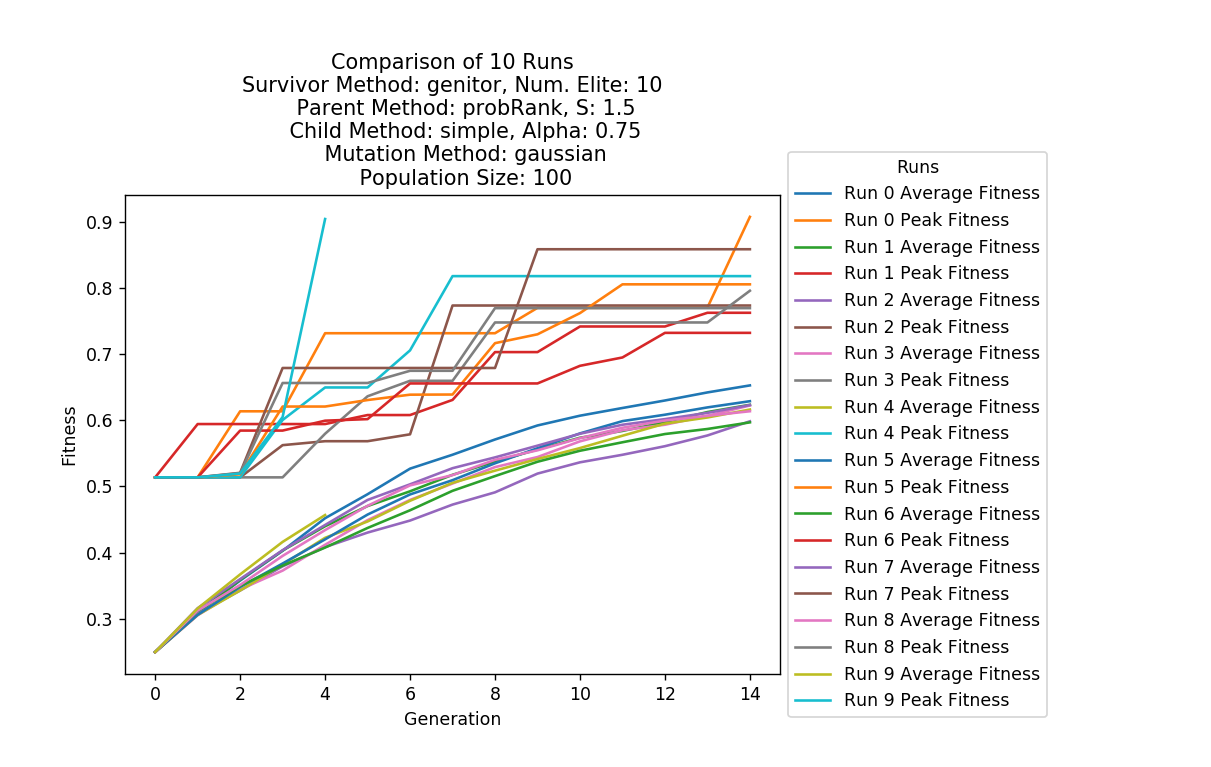

In [30]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.41642319673886563
Final Conditions: 0.941168777356198

Starting Conditions: 0.41642319673886563
Final Conditions: 0.9000022380698336

Starting Conditions: 0.41642319673886563
Final Conditions: 0.9294482491204192

Starting Conditions: 0.41642319673886563
Final Conditions: 0.8900451880530834

Starting Conditions: 0.41642319673886563
Final Conditions: 0.909270046319379

Starting Conditions: 0.41642319673886563
Final Conditions: 0.9249753467992232

Starting Conditions: 0.41642319673886563
Final Conditions: 0.8722132854456721

Starting Conditions: 0.41642319673886563
Final Conditions: 0.8978218618384641

Starting Conditions: 0.41642319673886563
Final Conditions: 0.8809750001929458

Starting Conditions: 0.41642319673886563
Final Conditions: 0.9348417466527075



<IPython.core.display.Javascript object>


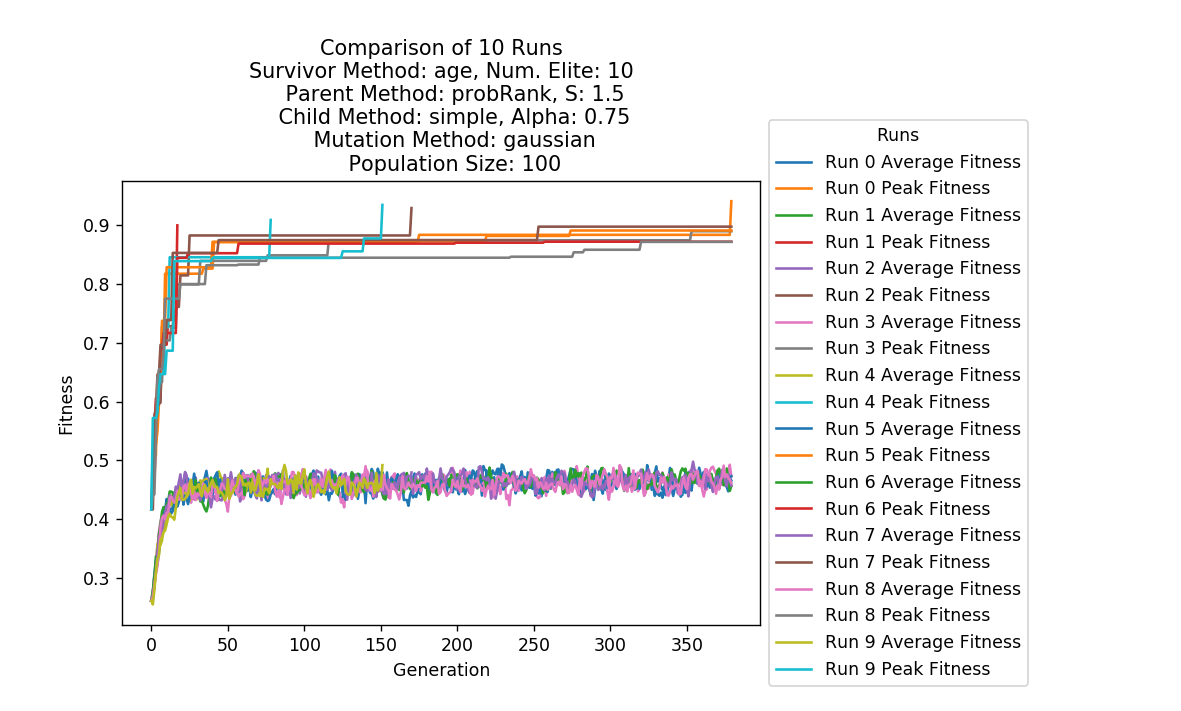

In [28]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.48200488884992215
Final Conditions: 0.8900367097892079

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9290574823167461

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9482073743275947

Starting Conditions: 0.48200488884992215
Final Conditions: 0.8989447290769004

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9073266863415576

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9104888846741208

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9109313236951948

Starting Conditions: 0.48200488884992215
Final Conditions: 0.8748809215846431

Starting Conditions: 0.48200488884992215
Final Conditions: 0.9159028986193973

Starting Conditions: 0.48200488884992215
Final Conditions: 0.92273523763082



<IPython.core.display.Javascript object>


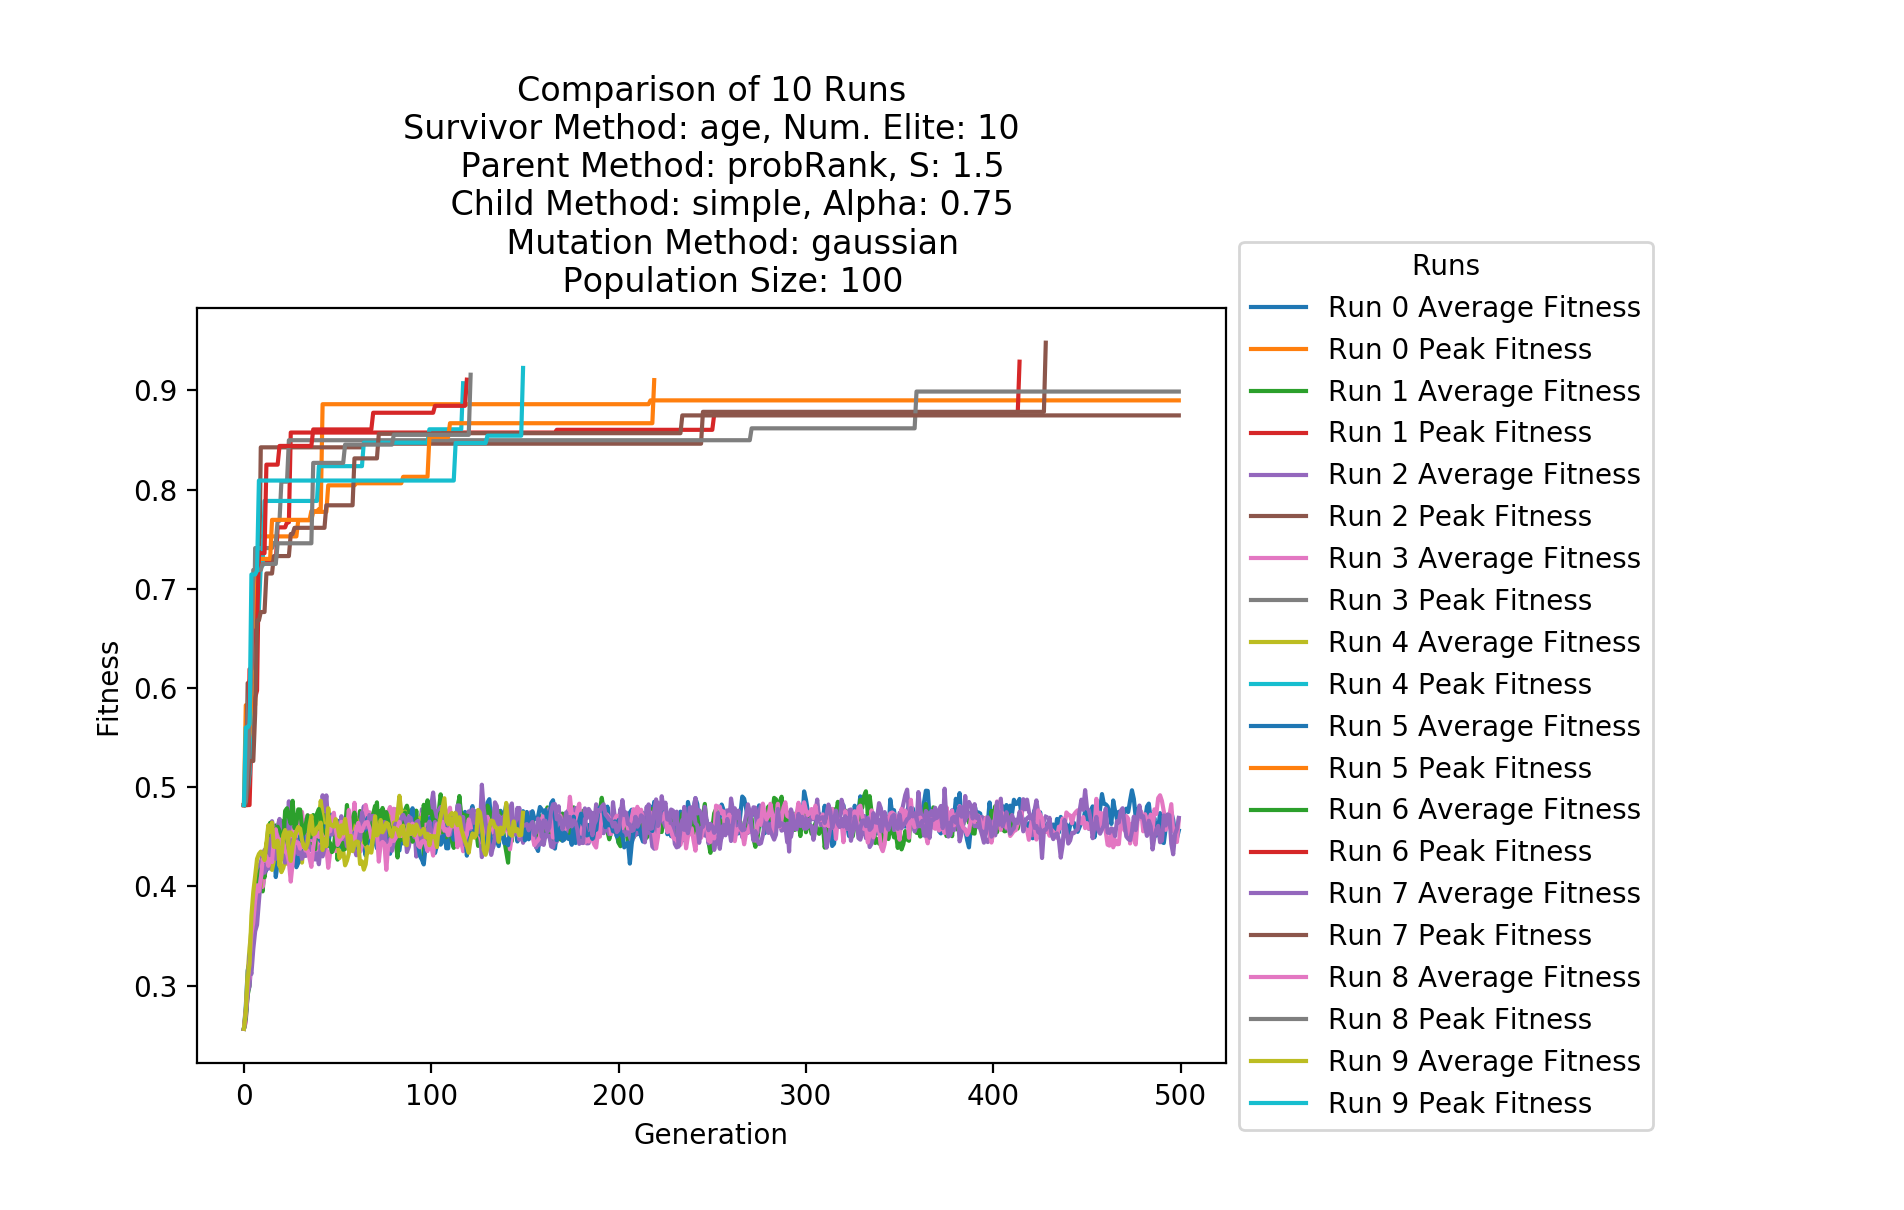

In [26]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4066141158603009
Final Conditions: 0.8944237316017982

Starting Conditions: 0.4066141158603009
Final Conditions: 0.9024284633287927

Starting Conditions: 0.4066141158603009
Final Conditions: 0.9003313788006242

Starting Conditions: 0.4066141158603009
Final Conditions: 0.8938810437239713

Starting Conditions: 0.4066141158603009
Final Conditions: 0.8973316546914709

Starting Conditions: 0.4066141158603009
Final Conditions: 0.9171306577245101

Starting Conditions: 0.4066141158603009
Final Conditions: 0.8983827820505847

Starting Conditions: 0.4066141158603009
Final Conditions: 0.9047890341571783

Starting Conditions: 0.4066141158603009
Final Conditions: 0.9247111081391963

Starting Conditions: 0.4066141158603009
Final Conditions: 0.8844035443495845



<IPython.core.display.Javascript object>


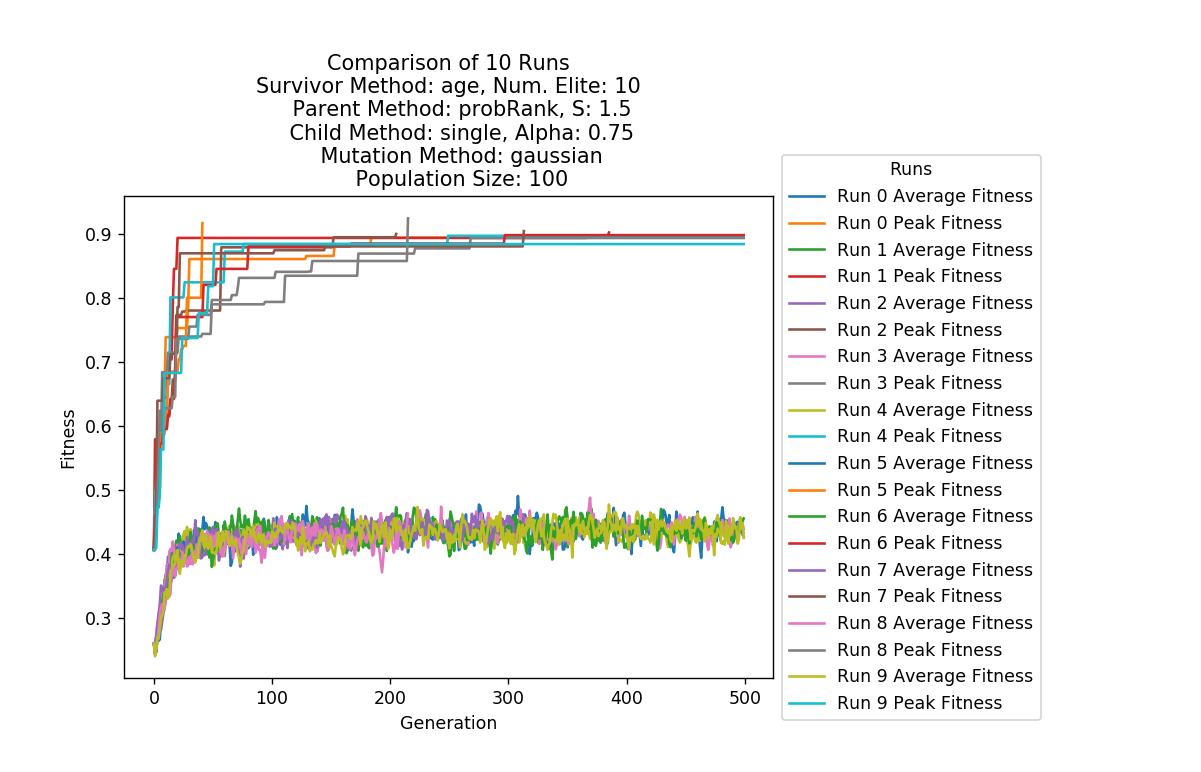

In [24]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.4188526751148127
Final Conditions: 0.6503511535951104

Starting Conditions: 0.4188526751148127
Final Conditions: 0.7535177033035636

Starting Conditions: 0.4188526751148127
Final Conditions: 0.7846422078659393

Starting Conditions: 0.4188526751148127
Final Conditions: 0.6433973441604635

Starting Conditions: 0.4188526751148127
Final Conditions: 0.647392981554407

Starting Conditions: 0.4188526751148127
Final Conditions: 0.82514702045621

Starting Conditions: 0.4188526751148127
Final Conditions: 0.7097668849056424

Starting Conditions: 0.4188526751148127
Final Conditions: 0.7394610644361463

Starting Conditions: 0.4188526751148127
Final Conditions: 0.6519610026225728

Starting Conditions: 0.4188526751148127
Final Conditions: 0.6601183313814654



<IPython.core.display.Javascript object>


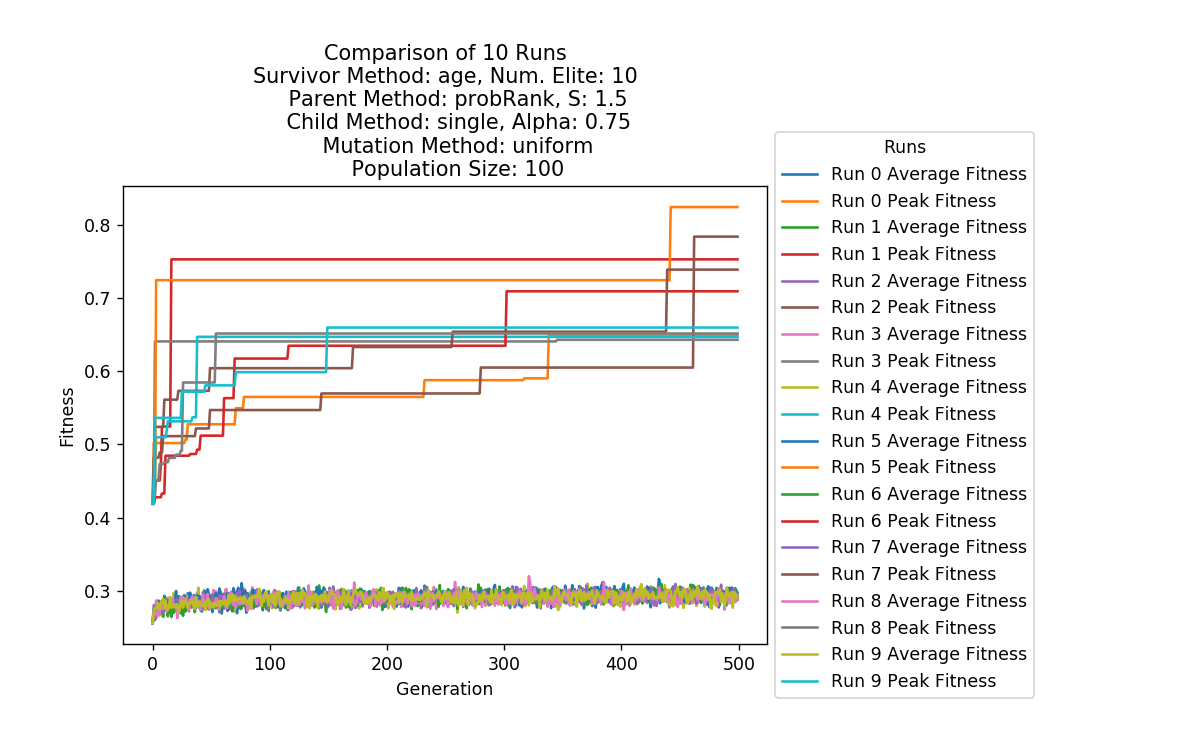

In [22]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.5343888700990636
Final Conditions: 0.6241575001051888

Starting Conditions: 0.5343888700990636
Final Conditions: 0.7230987280210612

Starting Conditions: 0.5343888700990636
Final Conditions: 0.696291466173925

Starting Conditions: 0.5343888700990636
Final Conditions: 0.657018189474697

Starting Conditions: 0.5343888700990636
Final Conditions: 0.6153792878973106

Starting Conditions: 0.5343888700990636
Final Conditions: 0.668935377921674

Starting Conditions: 0.5343888700990636
Final Conditions: 0.6573749724569043

Starting Conditions: 0.5343888700990636
Final Conditions: 0.7023534295207713

Starting Conditions: 0.5343888700990636
Final Conditions: 0.672461437697691

Starting Conditions: 0.5343888700990636
Final Conditions: 0.7117572032228476



<IPython.core.display.Javascript object>


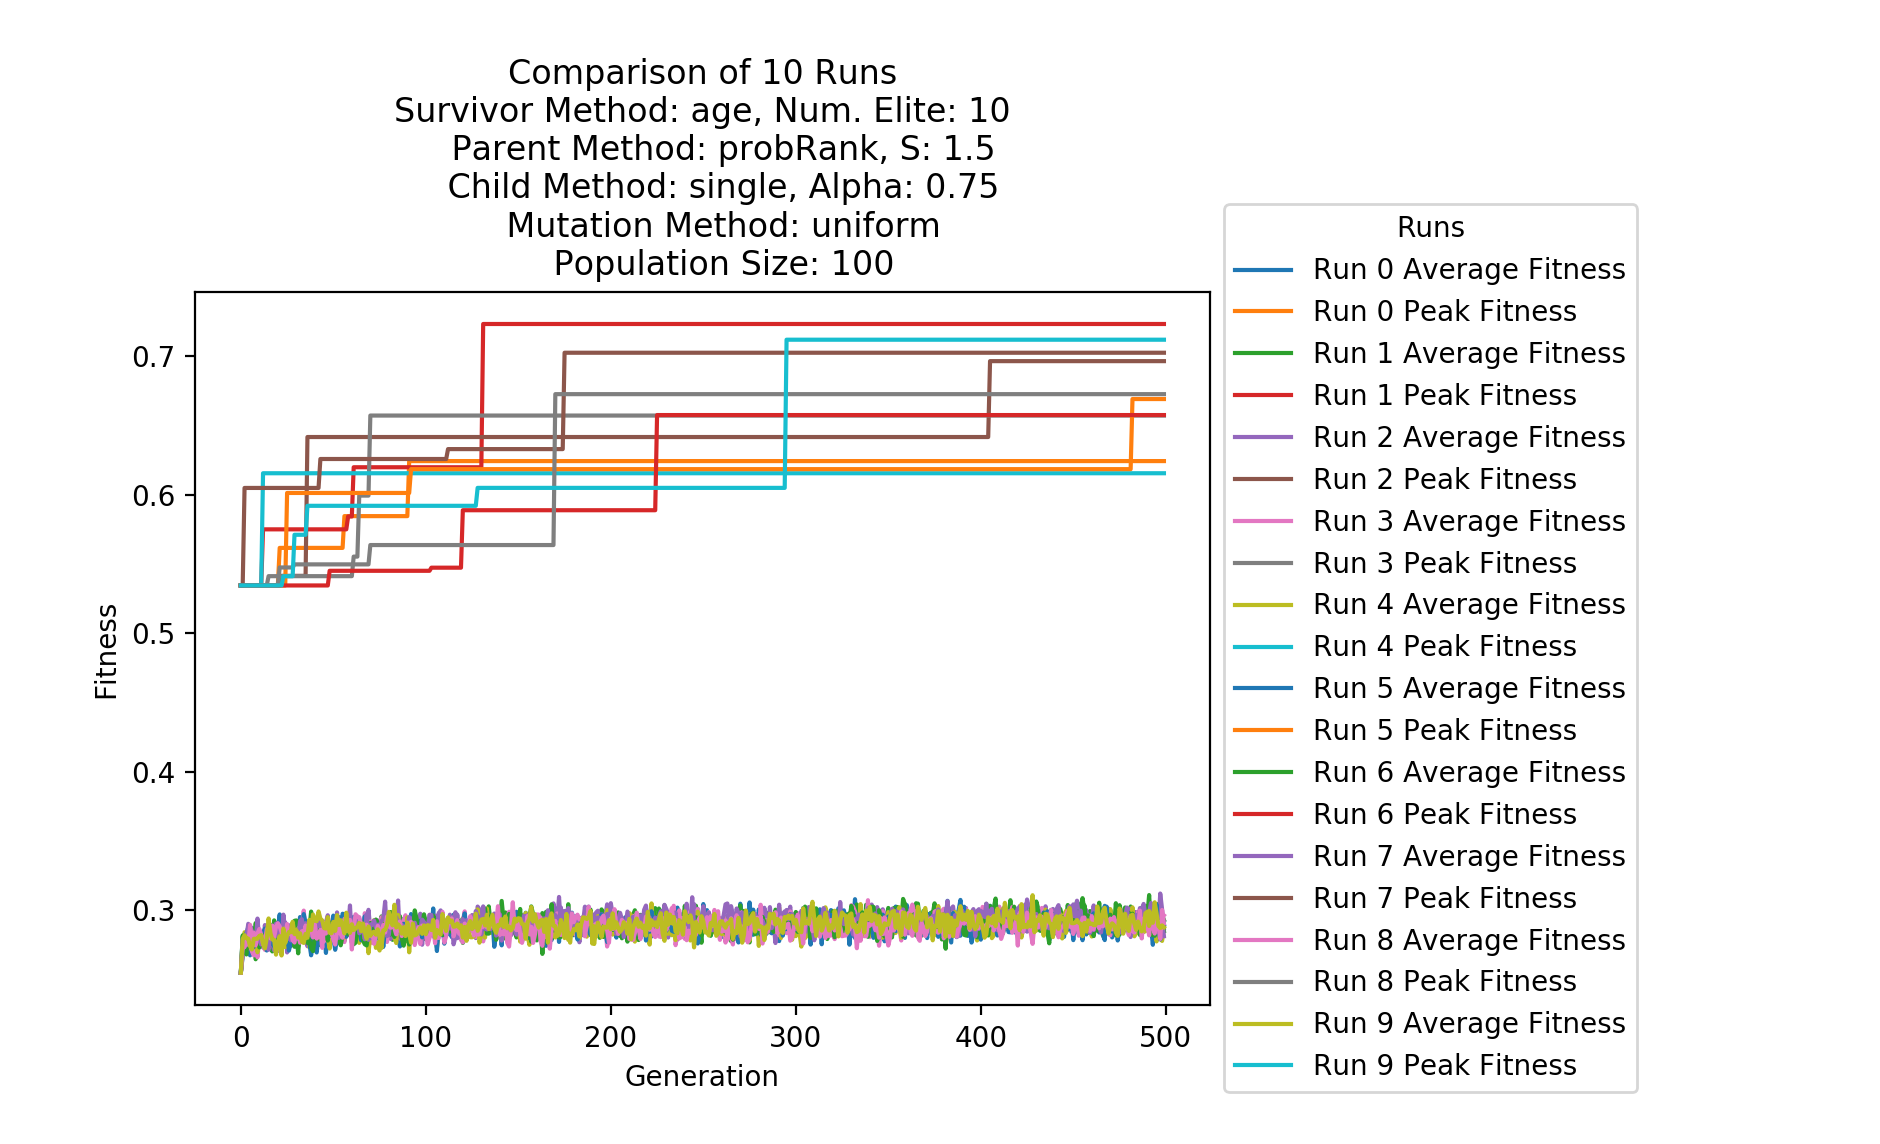

In [20]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8832313335409279

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8347248875417396

Starting Conditions: 0.35121413756232467
Final Conditions: 0.9220357729718536

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8436768900950817

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8533484924873459

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8823190963124379

Starting Conditions: 0.35121413756232467
Final Conditions: 0.9075004989682143

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8796495423729322

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8649224238146704

Starting Conditions: 0.35121413756232467
Final Conditions: 0.8397820530257387



<IPython.core.display.Javascript object>


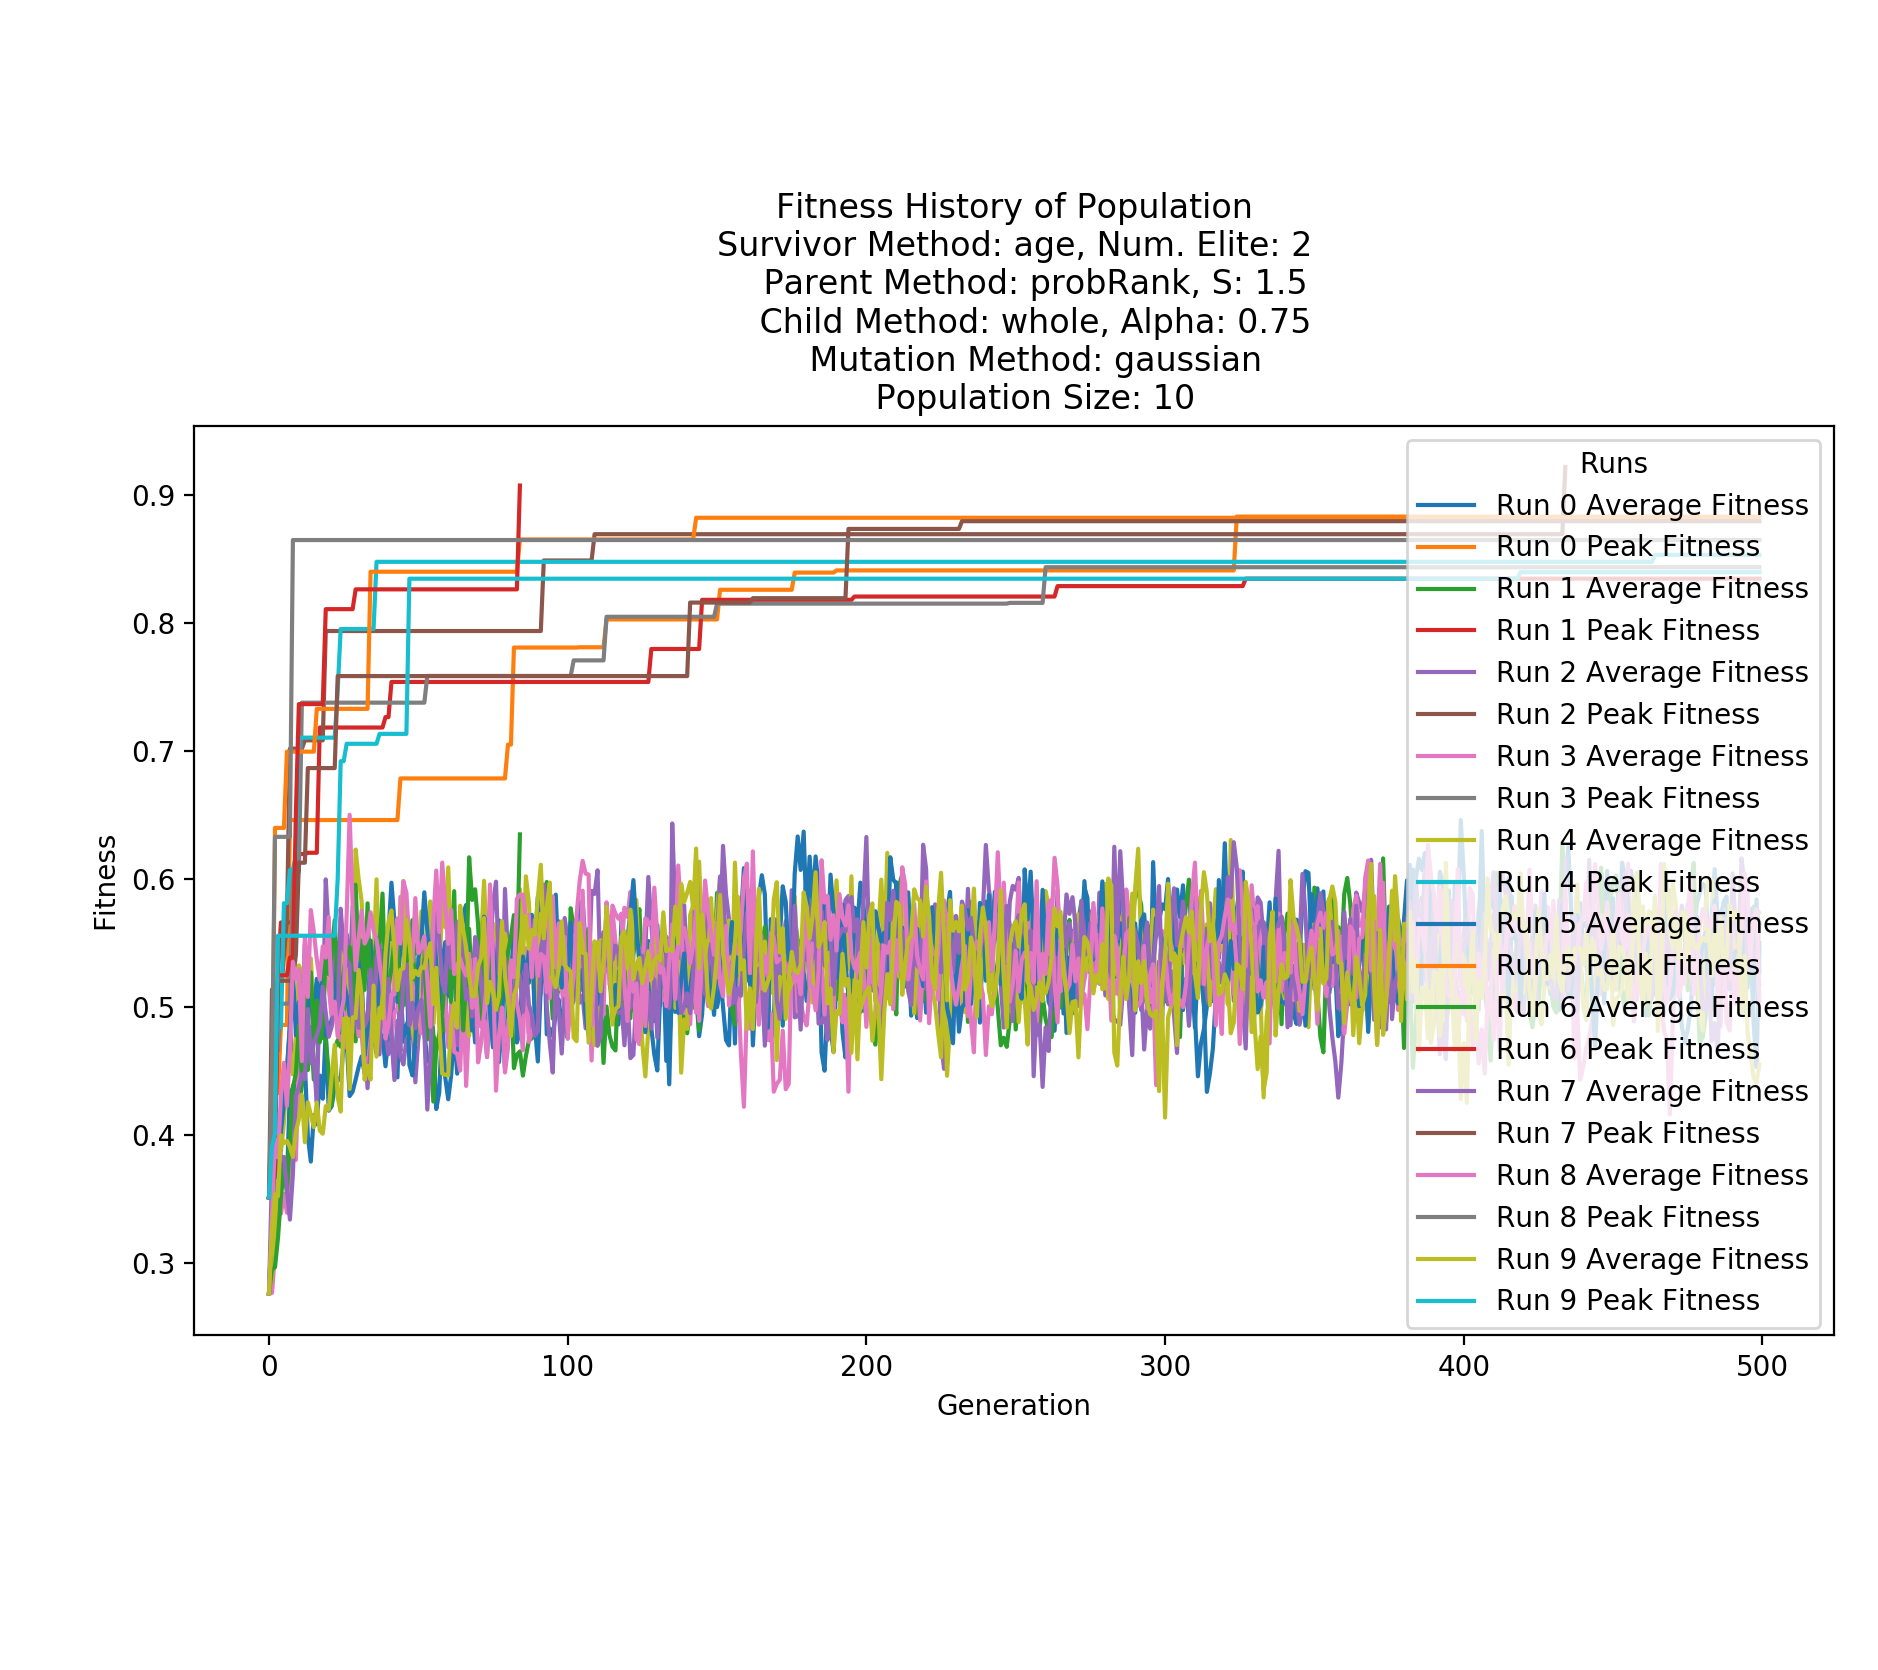

In [20]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

Starting Conditions: 0.2786457151095399
Final Conditions: 0.33110295761873615

Starting Conditions: 0.2786457151095399
Final Conditions: 0.3631272416494574

Starting Conditions: 0.2786457151095399
Final Conditions: 0.4312115697403258

Starting Conditions: 0.2786457151095399
Final Conditions: 0.33478375918727155

Starting Conditions: 0.2786457151095399
Final Conditions: 0.39133955150103494

Starting Conditions: 0.2786457151095399
Final Conditions: 0.4029548091833207

Starting Conditions: 0.2786457151095399
Final Conditions: 0.38933720302231045

Starting Conditions: 0.2786457151095399
Final Conditions: 0.28119096927287907

Starting Conditions: 0.2786457151095399
Final Conditions: 0.4317916292489842

Starting Conditions: 0.2786457151095399
Final Conditions: 0.3333161012603079



<IPython.core.display.Javascript object>


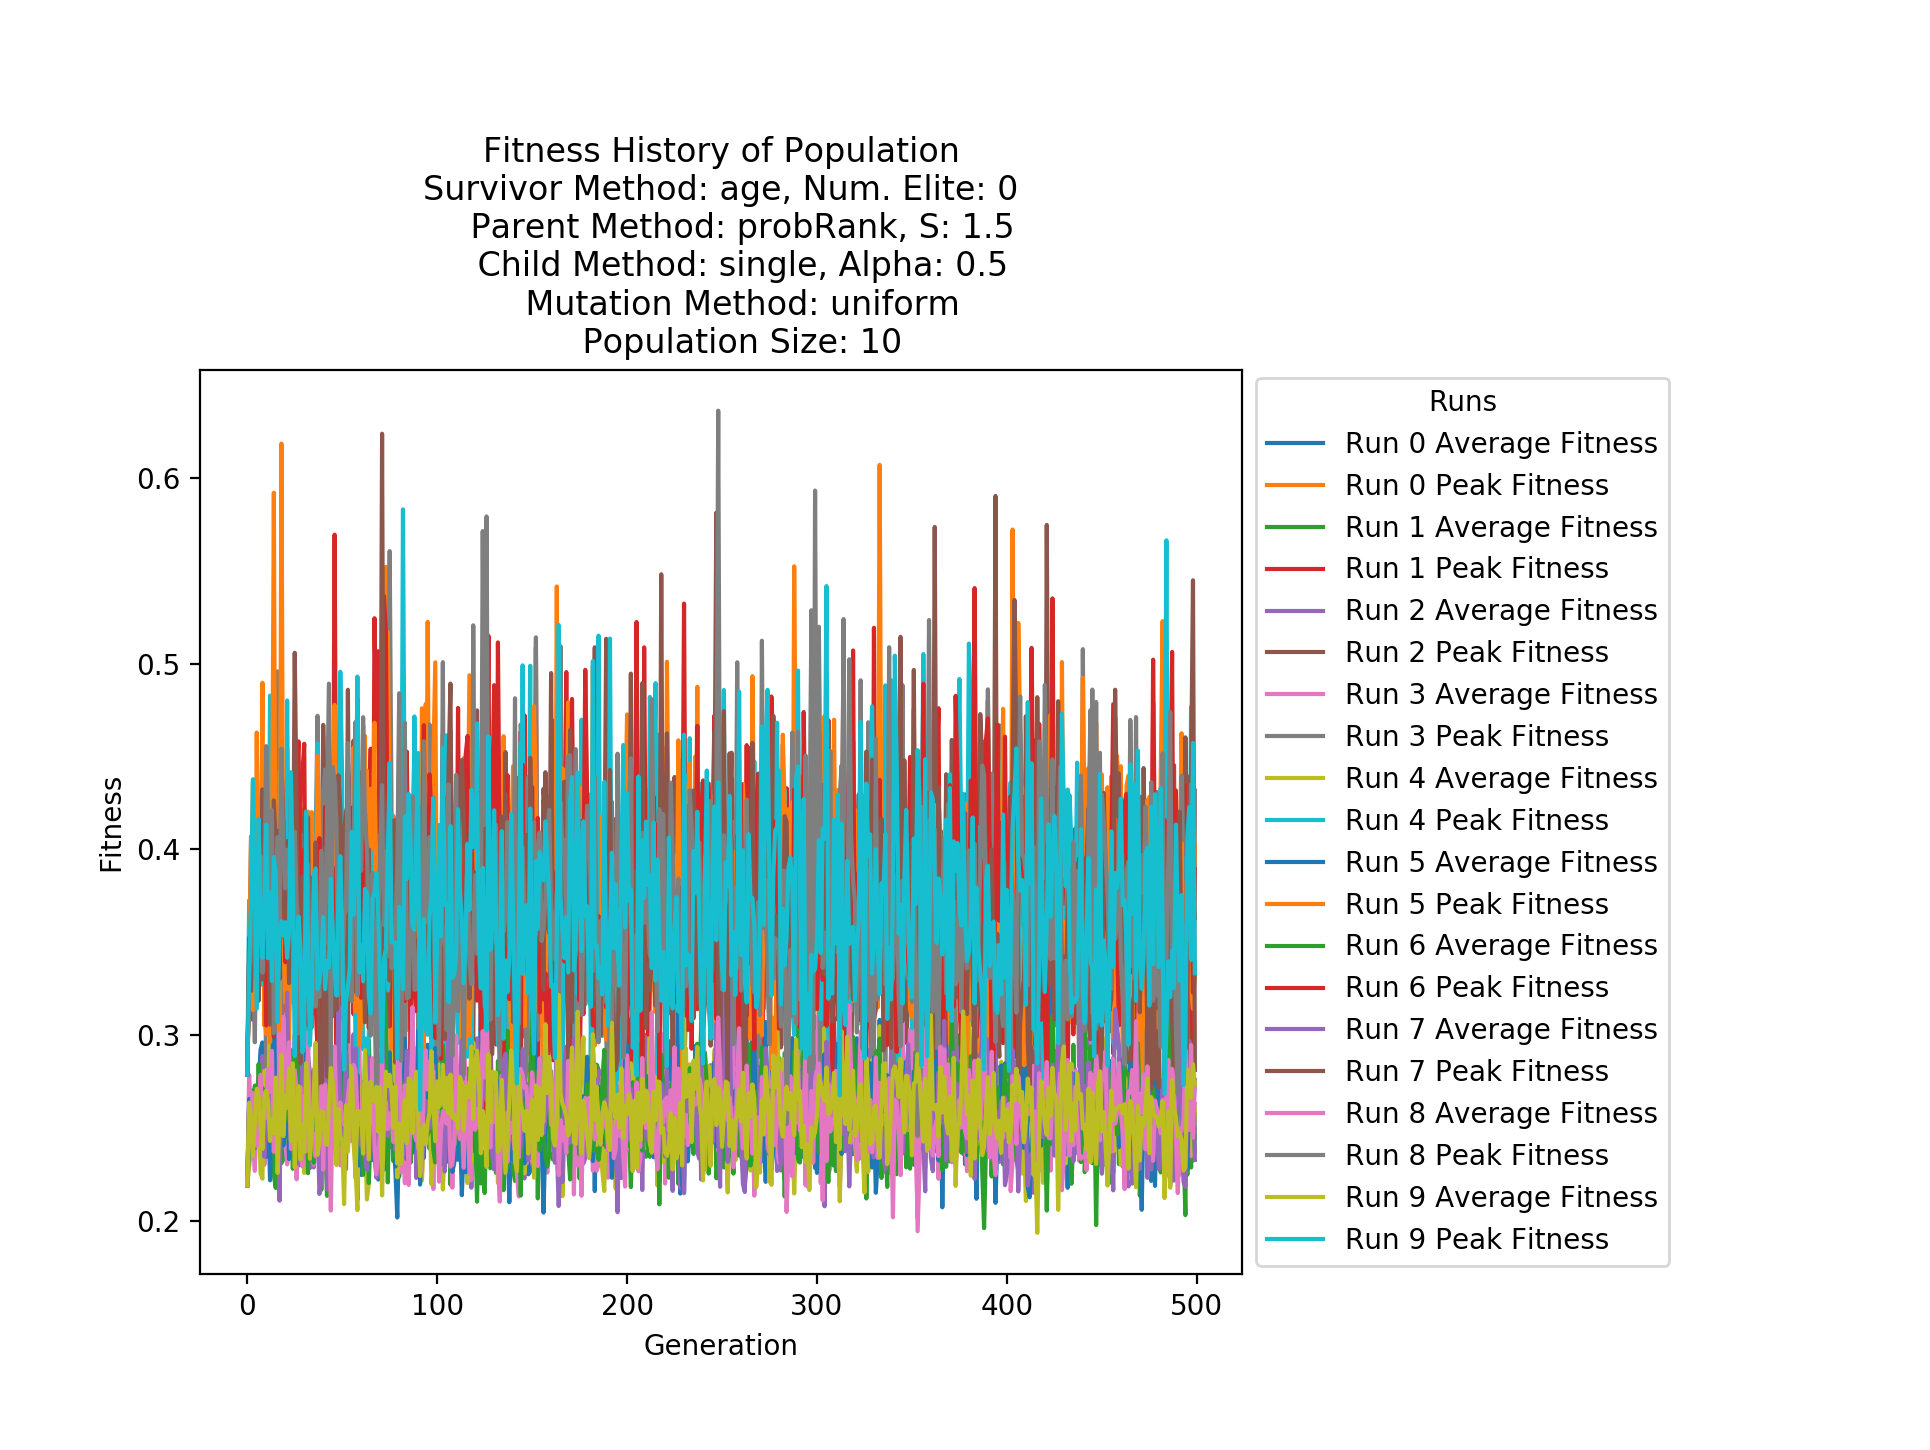

In [17]:
PlotMultRuns(pop, generations = nGenerations, runs = numRuns)

## Some Plots
I was playing around with settings to see their effects.  These did not start from the same initial population, but I still wanted to plot them to get a sense of their performance.

This also is not an exhaustive list of the combinations.  I just tried tweaking a few and building off of those that seemed to cause improvements.

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)

In [ ]:
PlotResults(pop)